***Importing data from kaggle***

In [1]:
 
#importing data from kaggle
 
from google.colab import files
files.upload()  #upload your kaggle json file by creating New API Token at kaggle-->My Profile--> account
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q "/content/chest-xray-pneumonia.zip"

Saving kaggle.json to kaggle.json
100% 2.29G/2.29G [00:32<00:00, 77.5MB/s]
100% 2.29G/2.29G [00:32<00:00, 76.2MB/s]


renaming files in train folder

In [2]:
import os
train='/content/chest_xray/train'
test='/content/chest_xray/test'
val='/content/chest_xray/val'
 
#renaming images inside the NORMAL subfolder inside train folder
 
path1=os.path.join(train,'NORMAL')
os.chdir(path1)
i=0
for file in os.listdir():
  src=file
  dst='normal'+str(i)+'.jpeg'
  os.rename(src,dst)
  i=i+1
 
#renaming images inside the PNEUMONIA subfolder inside train folder
 
path2=os.path.join(train,"PNEUMONIA")
os.chdir(path2)
i=0
for file in os.listdir():
  src=file
  dst='pneumonia'+str(i)+'.jpeg'
  os.rename(src,dst)
  i=i+1

***Looking at our dataset images***

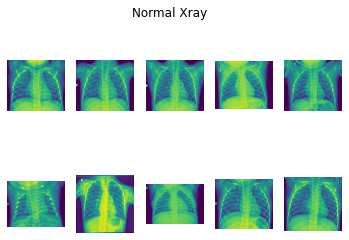

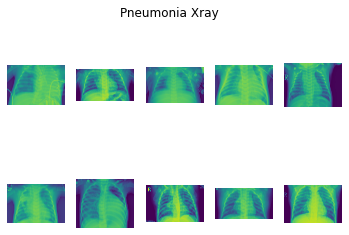

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mm
import pandas as pd
import numpy as np
 
train='/content/chest_xray/train'
test='/content/chest_xray/test'
val='/content/chest_xray/val'
 
#visualsing the normal chest xrays
 
for i in range(10): 
  newpath=os.path.join(path1,'normal')
  img=mm.imread(newpath+str(i)+'.jpeg')
  plt.subplot(2,5,i+1)                  
  plt.imshow(img)
  plt.axis("off")
plt.suptitle('Normal Xray')
plt.show()
 
#visualising the pneumonia chest xrays
for i in range(10): 
  newpath=os.path.join(path2,'pneumonia')
  img=mm.imread(newpath+str(i)+'.jpeg')
  plt.subplot(2,5,i+1)
  plt.imshow(img)
  plt.axis("off")
plt.suptitle('Pneumonia Xray')
plt.show()

***Reshaping ,generating labels, rescaling with the help of Image Data generator for training and validation dataset***

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20)
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(200,200),
    color_mode="grayscale",
    class_mode="binary"
 
)
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(200,200),
    color_mode="grayscale",
    class_mode="binary"
)
print(training.class_indices)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


# Base model
padding=same

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

Test Score


In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(200,200),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=1
)
scores=model.evaluate(testing)
print(scores[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 1.0638 - accuracy: 0.7099
0.7099359035491943


#2 Dropout layers of 0.5 and 0.2

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1152)             

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(200,200),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1
)
score=model.evaluate(testing)
print("test accuracy is: ",score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 9ms/step - loss: 1.6956 - accuracy: 0.6987
test accuracy is:  0.6987179517745972


Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    target_size=(200,200),
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1   
)
score=model.evaluate(testing)
print("test score is:",score[1])

#Increasing no. of Hidden/Fully Connected Layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1500,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1152)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 1.8776 - accuracy: 0.6442
test score is: 0.6442307829856873


Adding Dropout 

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1500,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1152)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 1.3459 - accuracy: 0.6699
test score is: 0.6698718070983887


#Decreasing the no. of fc layers

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200)
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 1.2239 - accuracy: 0.6939
test score is: 0.6939102411270142


#Increasing Size of fc layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(4000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 1.1565 - accuracy: 0.7035
test score is: 0.7035256624221802


**Adding Dropout**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4000,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=10,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_83 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_26 (Flatten)         (None, 1152)            

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 1.1885 - accuracy: 0.6875
test score is: 0.6875


#Changing fc layer sizes

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(4000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1152)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 2.6573 - accuracy: 0.6362
test score is: 0.6362179517745972


**Adding a hidden layer without dropout**

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(4000,activation='relu'))
model.add(Dense(2000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps)






Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 67, 67, 32)        832       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 17, 17, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1152)            

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate_generator(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
test score is: 0.6522436141967773


# Applying data augmentation to our train dataset on C

Data Augmentation

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(200,200),
    color_mode="grayscale",
    class_mode="binary"
)

validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(200,200),
    color_mode="grayscale",
    class_mode="binary"
)

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

Performance Visualised

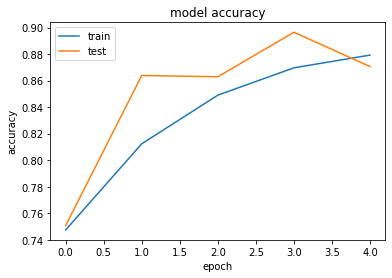

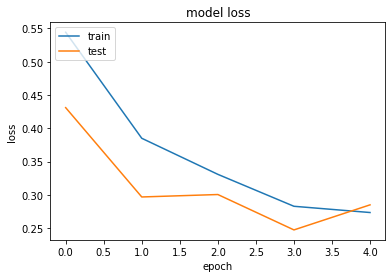

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 10ms/step - loss: 0.3251 - accuracy: 0.8654
test score is: 0.8653846383094788


No. of epochs=20

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 128)              

Test score

In [ ]:
 datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.2797 - accuracy: 0.8910
test score is: 0.8910256624221802


# Adding batch normalization at one fully connected layer

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 128)             

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    test,
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1
)
score=model.evaluate(testing)
print("the score is: ",score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 1.1224 - accuracy: 0.6619
the score is:  0.6618589758872986


# Removing pooling layers

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))

model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
flatten_17 (Flatten)         (None, 28800)             0         
_________________________________________________________________
dense_51 (Dense)             (None, 2000)              57602000  
_________________________________________________________________
dense_52 (Dense)             (None, 1000)              2001000   
_________________________________________________________________
dense_53 (Dense)             (None, 1)               

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    test,
    color_mode='grayscale',
    class_mode='binary',
    target_size=(200,200),
    batch_size=1
)
score=model.evaluate(testing)
print("the score is: ",score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.8704 - accuracy: 0.6875
the score is:  0.6875


# Base model with augmentation and dropout

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 128)             

Test score

In [ ]:
 datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.7443 - accuracy: 0.7468
test score is: 0.7467948794364929


# Increasing the number of filters per layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=64,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 66, 66, 64)        1664      
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 3, 3, 256)         295168    
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 256)             

In [ ]:
 datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.6936 - accuracy: 0.7196
test score is: 0.7195512652397156


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 66, 66, 32)        832       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 3, 3, 512)         1180160   
_________________________________________________________________
flatten_30 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_90 (Dense)             (None, 2000)            

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.5769 - accuracy: 0.6891
test score is: 0.6891025900840759


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(2000,activation='relu'))
model.add(Dense(1000,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_105 (Conv2D)          (None, 66, 66, 32)        832       
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 7, 7, 256)         295168    
_________________________________________________________________
flatten_31 (Flatten)         (None, 12544)             0         
_________________________________________________________________
dense_93 (Dense)             (None, 2000)              25090000  
_________________________________________________________________
dense_94 (Dense)             (None, 1000)            

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.5705 - accuracy: 0.7115
test score is: 0.7115384340286255


# Base model with 75 epochs

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=75,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 10ms/step - loss: 0.4516 - accuracy: 0.8349
test score is: 0.8349359035491943


# Removing all hidden layers


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 128)              

Visualisation

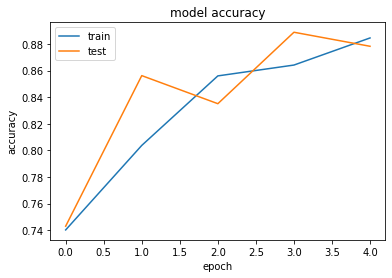

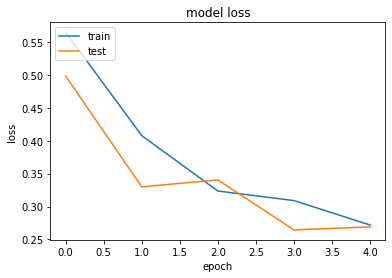

In [ ]:
 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3831 - accuracy: 0.8269
test score is: 0.8269230723381042


increased epochs=20

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(200,200,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)              

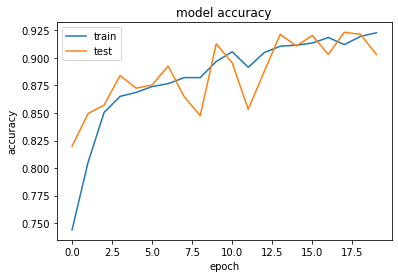

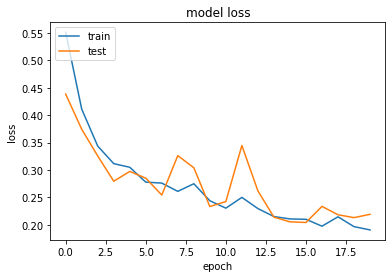

In [ ]:
 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(200,200),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.4685 - accuracy: 0.8205
test score is: 0.8205128312110901


# Changing all layers and input size to powers of 2

Augmentation and dataset resizing

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)

validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 66, 66, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)             

Visualisation

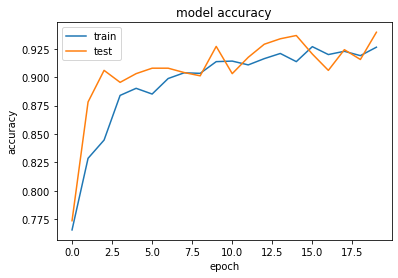

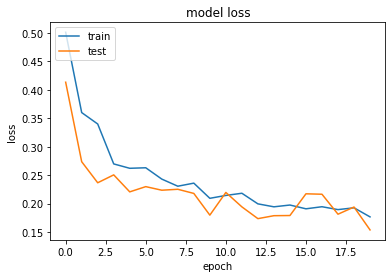

In [ ]:
 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.3622 - accuracy: 0.8638
test score is: 0.8637820482254028


# fc layers of size 4096 and 2048

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 128)             

Visualisation

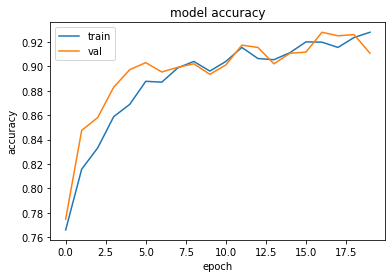

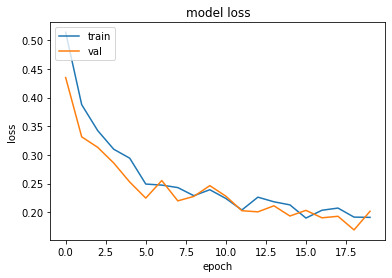

In [ ]:
 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3456 - accuracy: 0.8814
test score is: 0.8814102411270142


# Filter size changed to 3x3 with stride of 2 in the first layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 127, 127, 32)      320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

Visualisation for 5 epochs

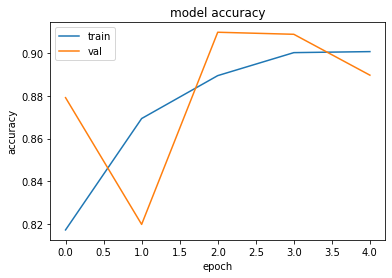

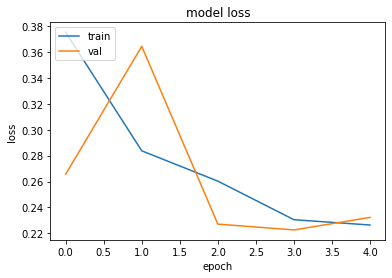

In [ ]:
#for 5 epochs 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score for 5 epochs

In [ ]:
#for 5 epochs
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.4618 - accuracy: 0.7821
test score is: 0.7820512652397156


Visualisation for 25 epoch

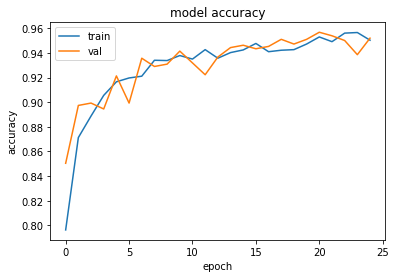

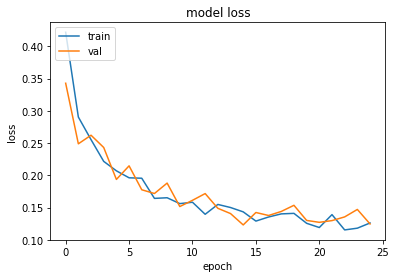

In [ ]:
#for 25 epochs 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score for 25 epochs

In [ ]:
#for 25 epochs
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.4703 - accuracy: 0.8109
test score is: 0.8108974099159241


# Increasing the depth of the architecture by increasing conv layers

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(2,2),padding="valid",activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(2048,activation='relu'))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 127, 127, 32)      320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 63, 63, 32)        9248      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 64)        36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

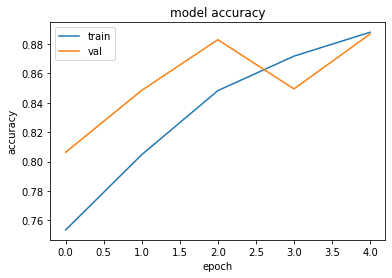

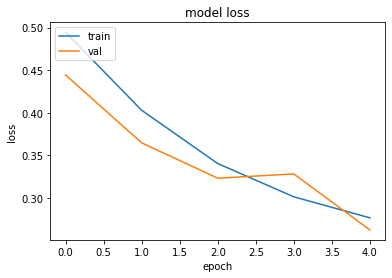

In [ ]:
 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.5348 - accuracy: 0.7163
test score is: 0.7163461446762085


# Changing activation layers from relu to leaky relu

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(2,2),padding="valid"))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())

model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.3))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 126, 126, 32)      832       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 6, 6, 128)        

Visulisation

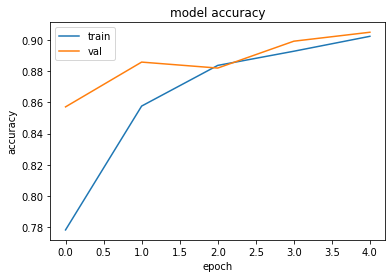

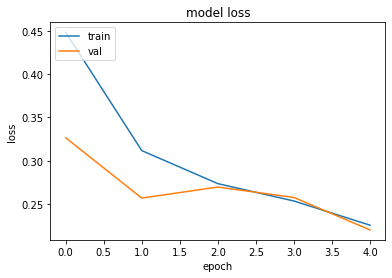

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.5226 - accuracy: 0.8077
test score is: 0.807692289352417


Changing alpha for leaky relu

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(2,2),padding="valid"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())

model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 126, 126, 32)      832       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 6, 6, 128)        

Visualisation

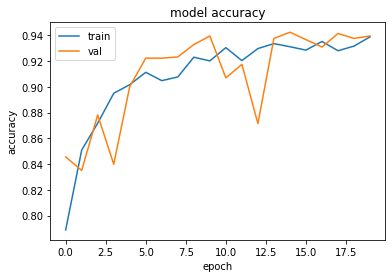

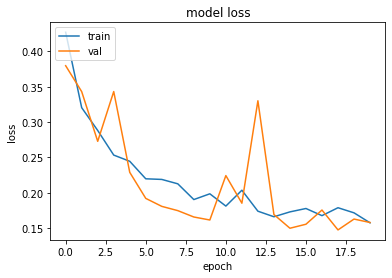

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.5142 - accuracy: 0.8365
test score is: 0.8365384340286255


Changing alpha value of leaky relu

In [ ]:
from tensorflow.keras.layers import LeakyReLU

model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(2,2),padding="valid"))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid'))
model.add(LeakyReLU(alpha=0.2))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())

model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))


model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 126, 126, 32)      832       
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 6, 6, 128)       

Visualisation

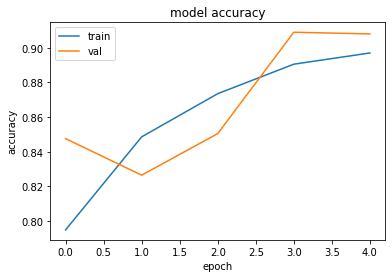

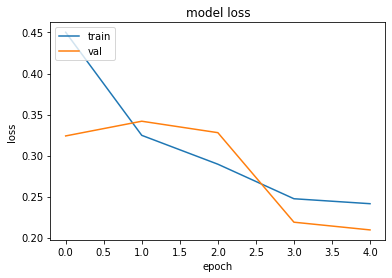

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#for 25 epochs
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.4244 - accuracy: 0.8317
test score is: 0.8317307829856873


# Base Model input shape at 256x256

Resizing target image to 256

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=20,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 128)             

Visualisation

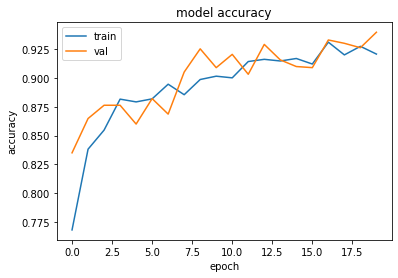

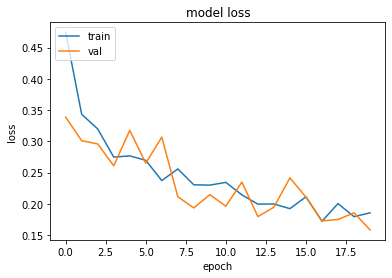

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)

score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3707 - accuracy: 0.8670
test score is: 0.8669871687889099


increased epochs

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 128)              

Visualisation

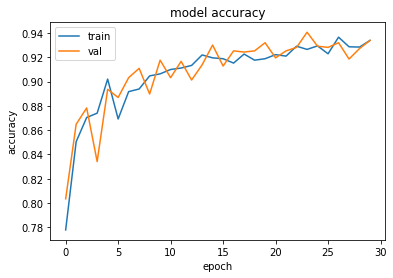

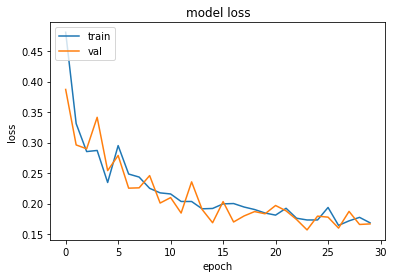

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3147 - accuracy: 0.8894
test score is: 0.8894230723381042


# Reducing size of fc layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 128)             

Visualisation

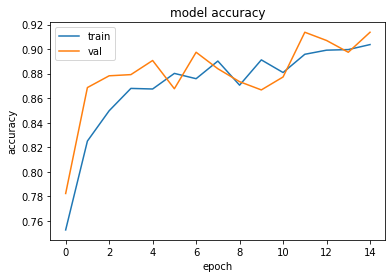

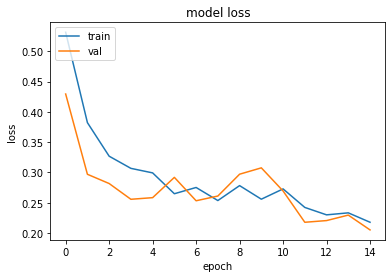

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.2821 - accuracy: 0.8958
test score is: 0.8958333134651184


Increased epochs

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 128)             

Visualisation

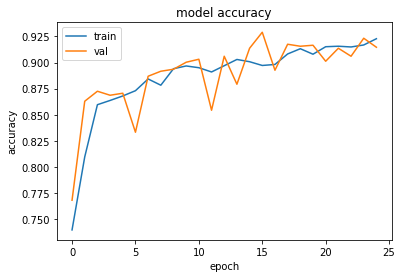

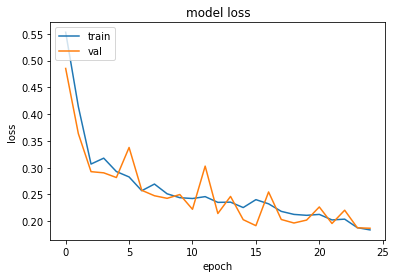

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
#for 25 epochs
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3160 - accuracy: 0.8942
test score is: 0.8942307829856873


Adding a fc layer

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 128)             

Visualsation

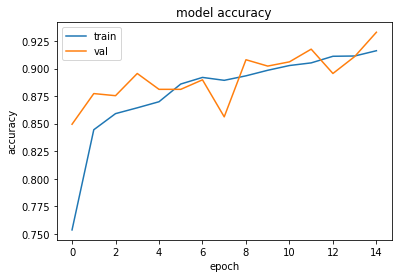

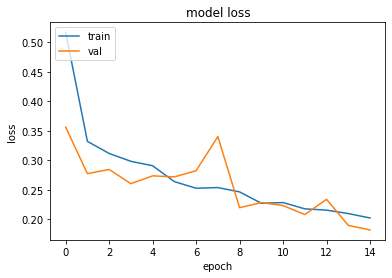

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3670 - accuracy: 0.8670
test score is: 0.8669871687889099


Increased epochs 

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=50,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_61 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 128)             

Visualisation

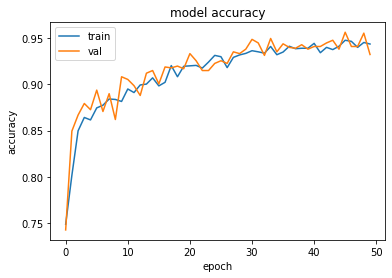

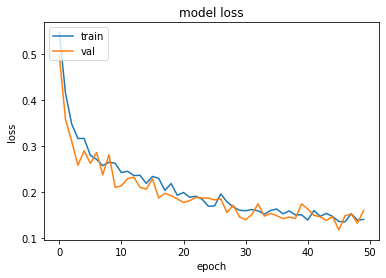

In [ ]:
#for 50 epochs 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
#for 50 epochs
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.3017 - accuracy: 0.8926
test score is: 0.8926281929016113


# Reducing max pooling size to 2

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 512)             

Visualisation

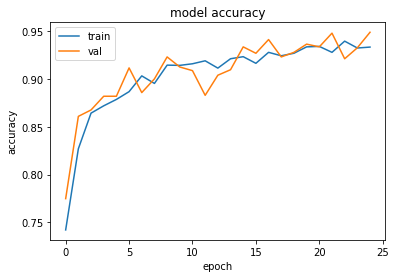

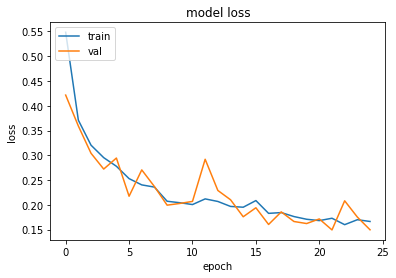

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.3905 - accuracy: 0.8429
test score is: 0.8429487347602844


# Fc layer size 128

In [ ]:
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation= 'sigmoid'))


model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)

history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history






Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 128)             

Visualisation

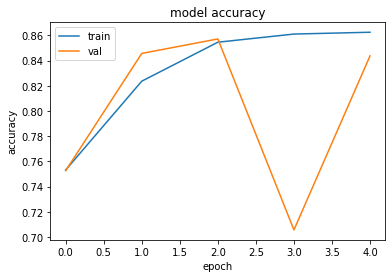

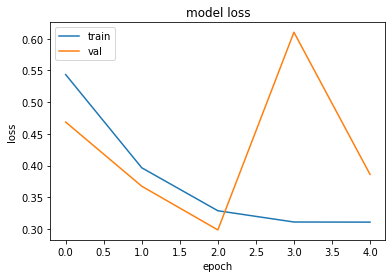

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.7707 - accuracy: 0.7115
test score is: 0.7115384340286255


# fc 2048 and 1048 with leaky relu activation alpha=0.2

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=100,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 84, 84, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 41, 41, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Visualisation

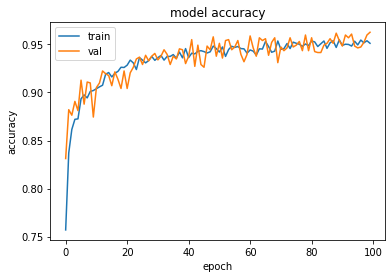

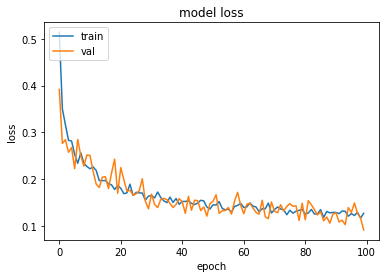

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:

datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.3940 - accuracy: 0.8798
test score is: 0.879807710647583


# Input shape resized to 150x150

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(227,227),
    color_mode="grayscale",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(150,150,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 49, 49, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 2048)              3278848   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 2048)             

Visualisation

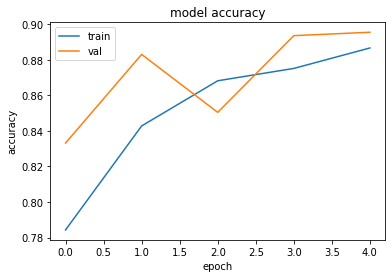

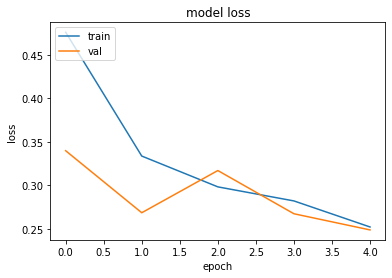

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(150,150),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.3375 - accuracy: 0.8798
test score is: 0.879807710647583


epochs increased

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(150,150,1),kernel_size=(5,5),strides=(3,3),padding="valid",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='valid',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding="valid"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=10,
          validation_data=validation,validation_steps=valsteps).history

Visualisation

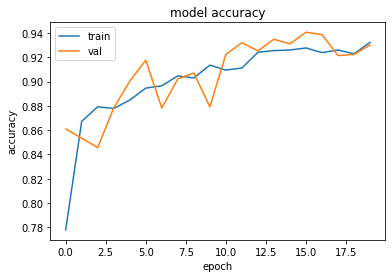

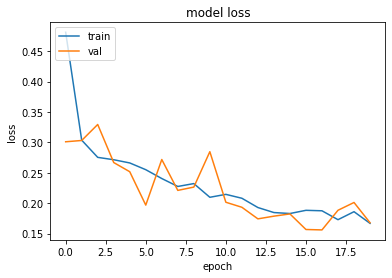

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(150,150),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 11ms/step - loss: 0.6480 - accuracy: 0.6731
test score is: 0.6730769276618958


# Stacking conv layers and then pooling

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
train='/content/chest_xray/train'
test='/content/chest_xray/test'
val='/content/chest_xray/val'
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation="relu"))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 43, 43, 64)        36928     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 21, 21, 128)      

Visualisation

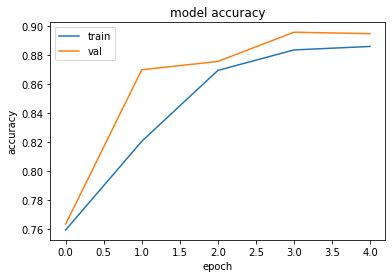

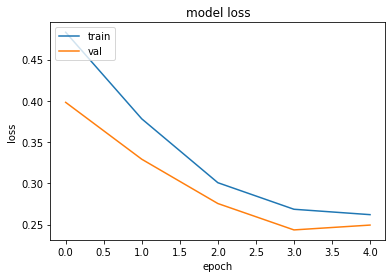

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 12ms/step - loss: 0.4877 - accuracy: 0.7500
test score is: 0.75


# Batch normalisation of all conv layers with momentum of 0.3

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
batch_normalization_23 (Batc (None, 86, 86, 32)        128       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
batch_normalization_24 (Batc (None, 43, 43, 64)        256       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 11, 11, 256)     

Visualisation

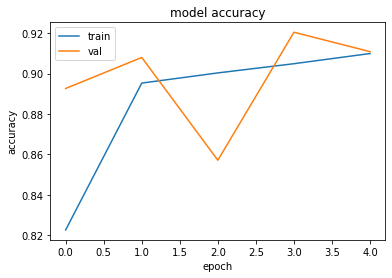

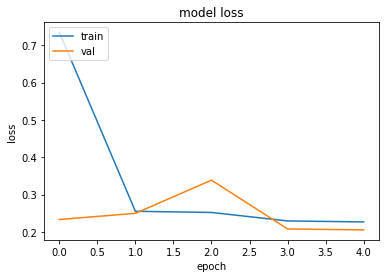

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:

datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.3365 - accuracy: 0.8670
test score is: 0.8669871687889099


Increased epochs

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Conv2D(filters=512,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(BatchNormalization(momentum=0.3))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
batch_normalization_28 (Batc (None, 86, 86, 32)        128       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 43, 43, 64)        18496     
_________________________________________________________________
batch_normalization_29 (Batc (None, 43, 43, 64)        256       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
batch_normalization_30 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 11, 11, 256)     

Visualisation

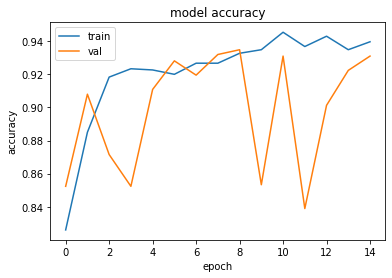

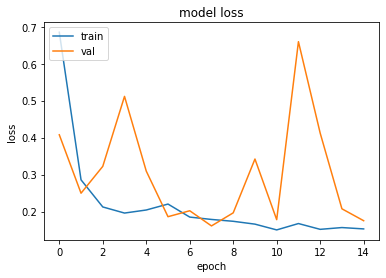

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 9ms/step - loss: 0.5036 - accuracy: 0.7853
test score is: 0.7852563858032227


# Setting learning rate at 0.001

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(227,227,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1024,activation='relu'))
model.add(LeakyReLU(alpha=0.2))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=10,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 76, 76, 32)        832       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 5, 5, 128)         73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_30 (Flatten)         (None, 1152)            

Test score

In [ ]:

datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(227,227),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.5113 - accuracy: 0.7644
test score is: 0.7644230723381042


# Fc layer 2048 with leaky Relu alpha=0.1

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_194 (Conv2D)          (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_95 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_195 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_96 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_196 (Conv2D)          (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_97 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_50 (Flatten)         (None, 1152)            

Visualisation

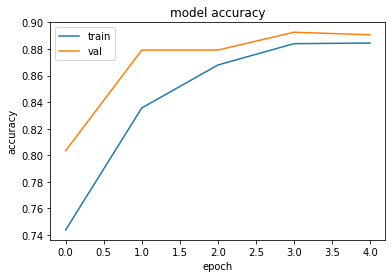

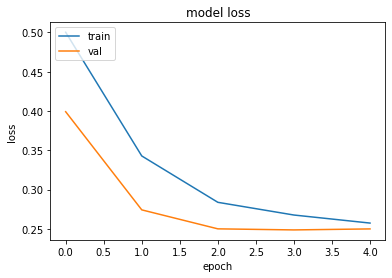

In [ ]:
#for 5 epochs 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.3208 - accuracy: 0.8814
test score is: 0.8814102411270142


Increased epochs

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_200 (Conv2D)          (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_101 (MaxPoolin (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_201 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_202 (Conv2D)          (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 1152)            

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.3798 - accuracy: 0.8670
test score is: 0.8669871687889099


# Increasing Batch size from 32 to 128

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=128
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=128
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=5,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_209 (Conv2D)          (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_110 (MaxPoolin (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 1152)            

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.3325 - accuracy: 0.8782
test score is: 0.8782051205635071


Increased epochs

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(2048))
model.add(LeakyReLU(alpha=0.1))

model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=10,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_230 (Conv2D)          (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_131 (MaxPoolin (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_231 (Conv2D)          (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_232 (Conv2D)          (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_133 (MaxPoolin (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_62 (Flatten)         (None, 1152)            

Visualisation

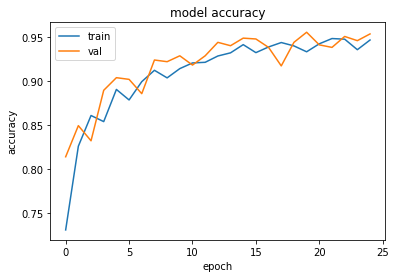

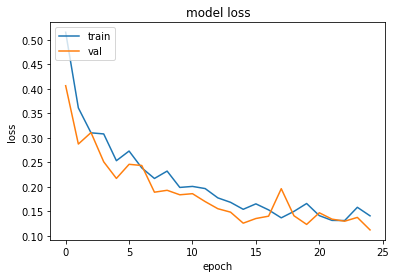

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])

Found 624 images belonging to 2 classes.
624/624 [==============================] - 5s 8ms/step - loss: 0.3737 - accuracy: 0.8397
test score is: 0.8397436141967773


# Fc layer is 256

For batch and augmentation

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=128
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary",
    batch_size=128
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

Visualisation

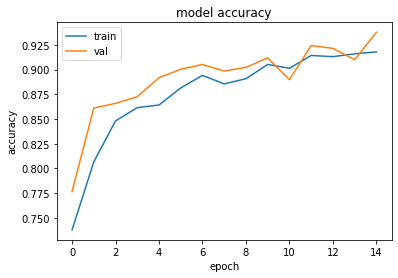

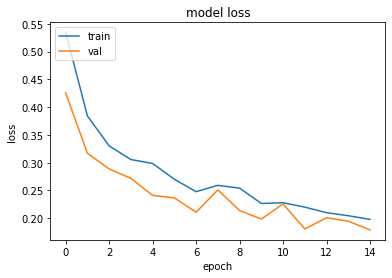

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.2789 - accuracy: 0.8942
test score is: 0.8942307829856873


increased epochs

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1152)             

Visualisation

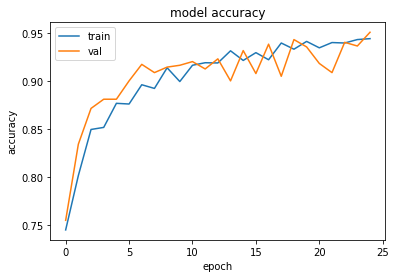

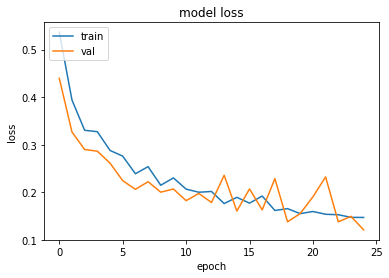

In [ ]:
#for 25 epochs 
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.3515 - accuracy: 0.8814
test score is: 0.8814102411270142


# Sep-r

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 6, 6, 256)         147712    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)             

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.4043 - accuracy: 0.8317
test score is: 0.8317307829856873


# Changing no. of filters in 3rd conv layer to 96

In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=15,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 6, 6, 96)          55392     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 3, 3, 96)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 864)              

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 9ms/step - loss: 0.5065 - accuracy: 0.7981
test score is: 0.7980769276618958


# back to batch size of 32 and defining beta and epsilon values for our adam optimiser

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(256,256),
    color_mode="grayscale",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import LeakyReLU, BatchNormalization
model=Sequential()
model.add(Conv2D(filters=32,input_shape=(256,256,1),kernel_size=(5,5),strides=(3,3),padding="same",activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(2,2),padding='same',activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding="same"))
model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation= 'sigmoid'))
 
 
model.summary()
opt=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
 
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
 
history=model.fit(training,steps_per_epoch=trainsteps,
          epochs=25,
          validation_data=validation,validation_steps=valsteps).history

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 86, 86, 32)        832       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 43, 43, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 6, 6, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1152)            

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='grayscale',
    target_size=(256,256),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 6s 10ms/step - loss: 0.3806 - accuracy: 0.8734
test score is: 0.8733974099159241


#Resnet transfer learning

Image size recommended for this model is 224x224x3

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


Importing resnet model and freezing its weights

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
model=Sequential()
model.add(ResNet50(input_shape=(224,224,3),include_top=False))
for layers in model.layers:
  layers.trainable=False
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
history=model.fit(training,steps_per_epoch=trainsteps,epochs=30,
                  validation_data=validation,validation_steps=valsteps)

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_17 (Flatten)         (None, 100352)            0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 100353    
Total params: 23,688,065
Trainable params: 100,353
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/30
131/131 [==============================] - 99s 755ms/step - loss: 0.7088 - accuracy: 0.7517 - val_loss: 0.4279 - val_accuracy: 0.8245
Epoch 2/30
131/131 [==============================] - 98s 751ms/step - loss: 0.4258 - accuracy: 0.8081 - val_loss: 0.5667 - val_accuracy: 0.7680
Epoch 3/30
131/131 [==============================] - 98s 752ms/step - loss

Visualisation

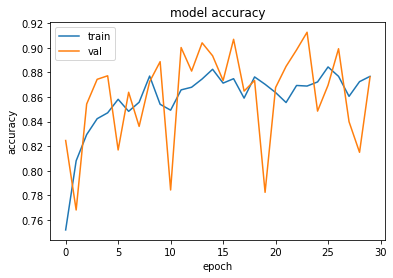

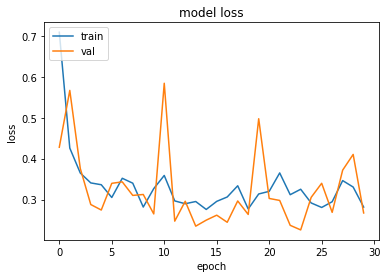

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='rgb',
    target_size=(224,224),
    class_mode='binary',
    shuffle=False,
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 8s 13ms/step - loss: 0.6001 - accuracy: 0.7516
test score is: 0.7516025900840759


#Inception transfer learning


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


Importing inceptionv3 and freezing its weights

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model=Sequential()
model.add(InceptionV3(input_shape=(224,224,3),include_top=False))
for layers in model.layers:
  layers.trainable=False
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
history=model.fit(training,steps_per_epoch=trainsteps,epochs=15,
                  validation_data=validation,validation_steps=valsteps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_5 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51201     
Total params: 21,853,985
Trainable params: 51,201
Non-trainable params: 21,802,784
_________________________________________________________________
Epoch 1/15
131/131 [==============================] - 99s 753ms/step - loss: 0.6868 - accuracy: 0.8759 - val_loss: 0.3034 - val_accuracy: 0.9204
Epoch 2/15
131/131 [==============================] - 97s 738ms/step - loss: 0.4438 - accuracy: 0.8979 - val_loss: 0.4070 - val_accuracy: 0.9204
Epoch 3/15
131/131 [==============================] - 97s 740ms/step - loss: 

Visualisation

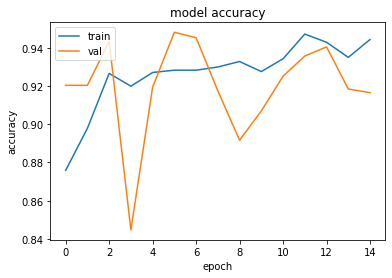

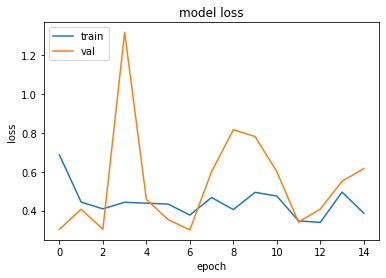

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='rgb',
    target_size=(224,224),
    class_mode='binary',
    batch_size=1    
)
score=model.evaluate_generator(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test score is: 0.7259615659713745


# Vgg 16 Transfer learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=.20,rotation_range=20,
        zoom_range=0.15,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.15,
        horizontal_flip=True,
        fill_mode="nearest")
 
training=datagen.flow_from_directory(
    train,
    subset="training",
    shuffle=True,
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)
 
validation=datagen.flow_from_directory(
    train,
    subset="validation",
    target_size=(224,224),
    color_mode="rgb",
    class_mode="binary"
)

Found 4173 images belonging to 2 classes.
Found 1043 images belonging to 2 classes.


Importing vgg16 and freezing its weights

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
VGG=VGG16(input_shape=[224,224,3],include_top=False)


In [ ]:
model=Sequential()
for layers in VGG.layers:
  layers.trainable=False
  model.add(layers)
model.add(Flatten())
model.add(Dense(1, activation= 'sigmoid'))
model.summary()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
import numpy as np
trainsteps=np.ceil(training.samples/training.batch_size)
valsteps=np.ceil(validation.samples/validation.batch_size)
history=model.fit(training,steps_per_epoch=trainsteps,epochs=15,
                  validation_data=validation,validation_steps=valsteps)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)     

Visualisation

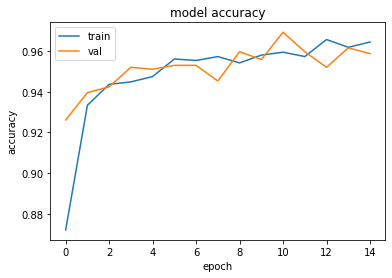

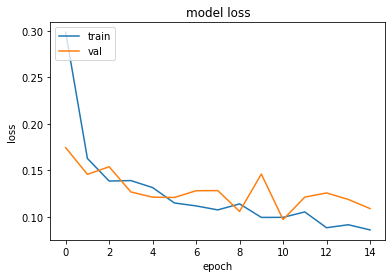

In [ ]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Test Score

In [ ]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
testing=datagen.flow_from_directory(
    '/content/chest_xray/test',
    color_mode='rgb',
    target_size=(224,224),
    class_mode='binary',
    shuffle=False,
    batch_size=1    
)
score=model.evaluate(testing)
print('test score is:',score[1])


Found 624 images belonging to 2 classes.
624/624 [==============================] - 7s 12ms/step - loss: 0.3198 - accuracy: 0.9022
test score is: 0.9022436141967773


Model stats on test dataset

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
predictions=model.predict_generator(testing,steps=624)
pred=np.where(predictions>0.5, 1, 0)
print(classification_report(testing.classes,pred))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       234
           1       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.91      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



Confusion matrix for our test dataset

In [ ]:
cm=confusion_matrix(testing.classes,pred)
cm

array([[191,  43],
       [ 18, 372]])